# Prediction of female-headed households in RSA using AdaBoost

In [49]:
# import libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

RSEED = 42

In [2]:
# import data
df = pd.read_csv("Train.csv")

In [4]:
#define X and y values
X = df.drop(['target', 'ward', 'ADM4_PCODE'], axis=1)
y = df["target"]

In [8]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

## AdaBoost with all features

In [15]:
# train adaboost regressor
ada = AdaBoostRegressor(random_state=0, n_estimators=100)
ada.fit(X, y)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

In [18]:
#evaluation metrics
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")


RMSE: 3.997026325820866
R2: 0.8403074387576908


In [ ]:
# plot residuals
residuals = y_test - y_pred

## AdaBoost with selected features

selected features derive from the feature importance in a random forest model

In [30]:
# correlation
corr = df.corr()
corr_list = corr[abs(corr["target"]) > 0.5]
corr_list = corr_list.sort_values("target").index.values.tolist()
corr_list.remove("target")
corr_list

['pw_00',
 'psa_01',
 'car_00',
 'stv_00',
 'lln_00',
 'pg_03',
 'NL',
 'lan_00',
 'pg_00',
 'lln_01',
 'stv_01',
 'car_01',
 'psa_00']

In [38]:
#define X (with selected values) and y values
X = df[["psa_00", "car_01", "pw_00", "lln_01","pg_00","dw_10"]]
#X = df[corr_list]
y = df["target"]
X

,psa_00,car_01,pw_00,lln_01,pg_00,dw_10
0,0.260191,0.726273,0.742692,0.881175,0.357455,0.001431
1,0.290228,0.855362,0.309294,0.933097,0.698428,0.001253
2,0.186435,0.727780,0.323393,0.899991,0.672452,0.000000
3,0.281229,0.872125,0.677437,0.970845,0.728014,0.000000
4,0.196687,0.595493,0.771106,0.866448,0.753491,0.000000
...,...,...,...,...,...,...
2817,0.249796,0.204324,0.918325,0.802892,0.387404,0.003680
2818,0.243611,0.706102,0.426518,0.929214,0.619593,0.003154
2819,0.253504,0.602848,0.619392,0.906225,0.551808,0.000000
2820,0.272915,0.721146,0.567853,0.893250,0.366426,0.014031


In [39]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [86]:
# train adaboost regressor
ada = AdaBoostRegressor(random_state=RSEED, n_estimators=200, learning_rate=0.1, loss="exponential")
ada.fit(X, y)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

In [87]:
#evaluation metrics
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")

RMSE: 4.163344618051485
R2: 0.8267411646793033


/Users/janaconradi/neuefische/Zindi_Data_female_households_RSA/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='target'>

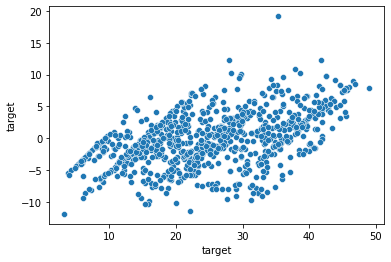

In [88]:
residuals = y_test - y_pred
sns.scatterplot(y_test, residuals)

## Gridsearch for best hyperparameters

In [62]:
ada.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

'n_estimators': np.arange(100, 1000, 10)

In [84]:
# Defining parameter grid (as dictionary)
param_grid = {'n_estimators': np.arange(100, 1000, 100),
 'learning_rate': [0.01, 0.1, 1.0],
 'loss': ['linear', 'square', 'exponential'],
}

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(AdaBoostRegressor(random_state=RSEED), param_grid, scoring='r2',
                  cv=5, n_jobs=-1)

# Fit gridsearch object to data
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
             scoring='r2')

In [85]:
gs.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}